# **PROJETO REGRESSÃO LINEAR MÚLTIPLA**

**Este projeto utilizado como projeto de estudos para a área de Machi.
ne Learning e Data Science com intuito de demonstrar conhecimento sobre os assuntos.**

**Elaborado por EDMUNDO LOPES SILVA**

[LINKEDIN](https://www.linkedin.com/in/edmundo-lopes-silva-7ab3b4163/)

Regressão Linear é uma técnica de Aprendizado Supervisionado que tem o intuito de modelar a relação entre uma ou mais variáveis independentes (ou preditoras) e uma variável dependente (ou alvo). Esta técnica utiliza uma metodologia baseado em retas, por isso a linearidade, para deduzir previsões precisas através dos cálculos dos coeficientes que definem a inclinação da reta.

Na regressão linear múltipla, temos mais de uma variável independente (X₁, X₂, ..., Xₙ) que influenciam a variável dependente (Y). A equação que descreve essa relação é uma extensão da regressão simples, como podemos ver na imagem a seguir.

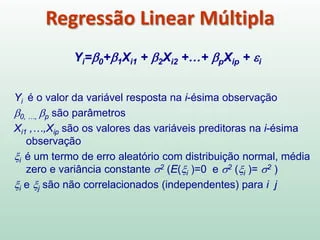

Aqui, cada coeficiente 𝛽 representa a mudança esperada em 𝑌 para uma unidade de aumento na variável 𝑋, mantendo todas as outras variáveis 𝑋 constantes.

Exemplo: Se quisermos prever o preço de uma casa (Y) com base em variáveis como número de quartos (X1), metragem quadrada (X2) e idade da casa (X3), a equação seria algo como:

        Preço = B0 + B1 * Quartos + B2 * Metragem_quadrada + B3 * idade


Ambas utilizam o método dos mínimos quadrados para ajustar a melhor linha ou hiperplano (no caso da múltipla) aos dados.

**APLICAÇÃO**

A regressão linear é bastante utilizada em problemas de previsão e análise, como:

- Prever preços de imóveis.
- Estimar salários baseados em qualificações e experiência.
- Analisar o impacto de diferentes fatores em vendas.

Essa técnica é essencial, pois fornece uma base para entender como variáveis se relacionam e é fácil de interpretar e implementar em Python usando bibliotecas como scikit-learn e statsmodels.

## **Regressão Linear Simples**

### Explicação do Projeto

Estrutura do Projeto:

1. Objetivo: Prever o preço de uma casa com base em múltiplas variáveis (tamanho, número de quartos, idade).

2. Dados: Vamos gerar um dataset com três variáveis independentes: tamanho da casa, número de quartos e idade da casa.

3. Modelo: Regressão linear múltipla.

4. Avaliação: Utilizaremos métricas como o erro quadrático médio (MSE) e o coeficiente de determinação (R2).

5. Visualização: Como temos várias variáveis, visualizaremos os resultados com gráficos e métricas.

Passos do Projeto:

1. Gerar dados.

2. Dividir o conjunto de dados em treino e teste.

3. Treinar o modelo de regressão linear múltipla.

4. Avaliar o modelo.

5. Visualizar e interpretar os resultados.

### Código

In [1]:
# Aqui faremos a importação das bibliotecas necessárias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
'''
  Podemos gerar um dataset aleatório com as variáveis necessárias para
  determinar o valor da casa
'''

np.random.seed(42)  # Para reprodutibilidade

# Variáveis independentes
tamanho = np.random.rand(100) * 500  # Tamanho da casa (0 a 500 m²)
quartos = np.random.randint(1, 6, size=100)  # Número de quartos (entre 1 e 5)
idade = np.random.randint(0, 100, size=100)  # Idade da casa (entre 0 e 100 anos)

# Variável dependente (Preço da casa)
preco = 50000 + (200 * tamanho) + (30000 * quartos) - (500 * idade) + np.random.randn(100) * 10000

# Criando um DataFrame com os dados
data = pd.DataFrame({
    'Tamanho': tamanho,
    'Quartos': quartos,
    'Idade': idade,
    'Preço': preco
})

# Exibir as primeiras linhas do DataFrame
print(data.head())

      Tamanho  Quartos  Idade          Preço
0  187.270059        1     56   84929.389561
1  475.357153        4     88  228841.928590
2  365.996971        5     49  259155.105865
3  299.329242        4     22  215444.431294
4   78.009320        5     30  191341.397852


In [3]:
# Aqui devemos realizar o Split do dataset em treino e teste

X = data[['Tamanho', 'Quartos', 'Idade']]  # Variáveis independentes
y = data['Preço']  # Variável dependente

# 80% para treinamento e 20% para teste para X (Tamanho) e y (Preço)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Levantaremos o modelo usando a biblioteca sklearn [scikit-learn]

modelo = LinearRegression()

# Faremos o Model.fit que representa o treinamento do modelo com os dados de treinamento

modelo.fit(X_train, y_train)

LinearRegression()

In [5]:
'''

  Agora que temos o modelo treinado, temos que definir as métricas
  para avaliar o modelo

'''

y_pred = modelo.predict(X_test)

In [6]:
# Métricas de avaliação
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"Coeficiente de Determinação (R²): {r2}")

# Exibir os coeficientes do modelo
print(f"Intercepto (β0): {modelo.intercept_}")
print(f"Coeficientes (β1, β2, β3): {modelo.coef_}")

Erro Quadrático Médio (MSE): 148448022.26260862
Coeficiente de Determinação (R²): 0.9630371873923349
Intercepto (β0): 55378.1241506332
Coeficientes (β1, β2, β3): [  198.5166565  29846.84136011  -532.07142024]


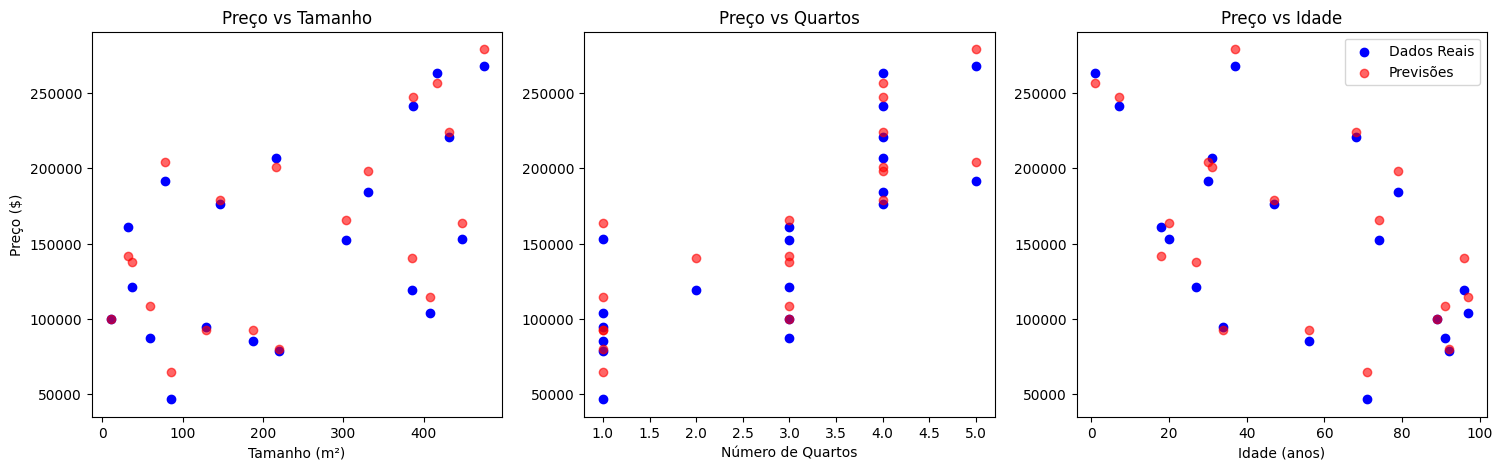

In [7]:
#  Visualização (gráficos de dispersão para variáveis independentes vs Preço)

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].scatter(X_test['Tamanho'], y_test, color='blue', label='Dados Reais')
axs[0].scatter(X_test['Tamanho'], y_pred, color='red', label='Previsões', alpha=0.6)
axs[0].set_xlabel('Tamanho (m²)')
axs[0].set_ylabel('Preço ($)')
axs[0].set_title('Preço vs Tamanho')

axs[1].scatter(X_test['Quartos'], y_test, color='blue', label='Dados Reais')
axs[1].scatter(X_test['Quartos'], y_pred, color='red', label='Previsões', alpha=0.6)
axs[1].set_xlabel('Número de Quartos')
axs[1].set_title('Preço vs Quartos')

axs[2].scatter(X_test['Idade'], y_test, color='blue', label='Dados Reais')
axs[2].scatter(X_test['Idade'], y_pred, color='red', label='Previsões', alpha=0.6)
axs[2].set_xlabel('Idade (anos)')
axs[2].set_title('Preço vs Idade')

plt.legend()
plt.show()

'''
   Os pontos azuis representam os dados reais, e os pontos vermelhos
   representam as previsões feitas pelo modelo de regressão linear.
'''